Gender Classification Dataset Prompt - Create a model to predict male or female

This dataset contains 7 features and a label column.

longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

foreheadwidthcm - This column is in CM's. This is the width of the forehead.

foreheadheightcm - This is the height of the forehead and it's in Cm's.

nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

​


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")



In [5]:
df = pd.read_csv("gender_classification_v7.csv")

In [6]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [7]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [8]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [18]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

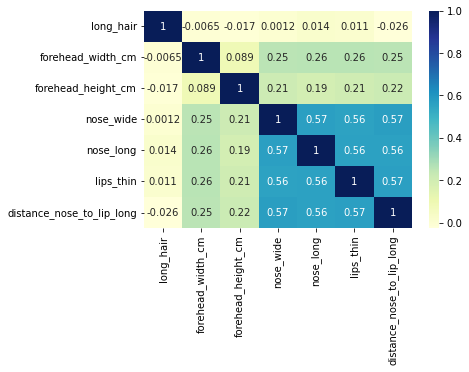

In [19]:
import seaborn as sns

plt.figure(figsize=(20,20))  # not needed
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [53]:
df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


<AxesSubplot:title={'center':'Whether the Participant Had Long Hair or Not'}, xlabel='long_hair', ylabel='count'>

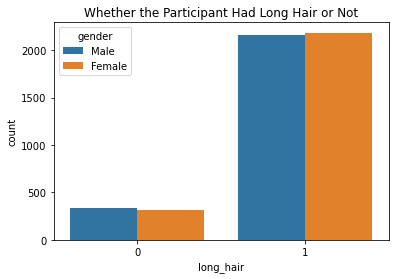

In [54]:
plt.title("Whether the Participant Had Long Hair or Not")
sns.countplot(df["long_hair"], hue=df['gender'])

<AxesSubplot:title={'center':'Forehead Height by Gender in CM'}, xlabel='forehead_height_cm', ylabel='gender'>

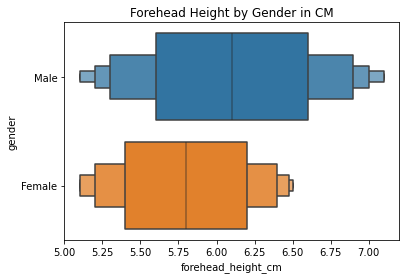

In [55]:
plt.title('Forehead Height by Gender in CM')
sns.boxenplot(data=df, x='forehead_height_cm', y='gender')

<AxesSubplot:title={'center':'Forehead Width by Gender in CM'}, xlabel='forehead_width_cm', ylabel='gender'>

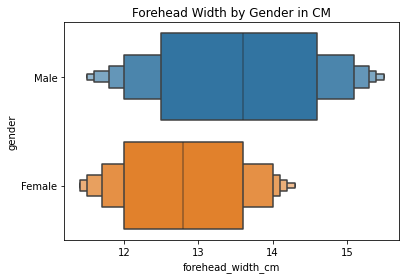

In [56]:
plt.title('Forehead Width by Gender in CM')
sns.boxenplot(data=df, x='forehead_width_cm', y='gender')

<AxesSubplot:title={'center':'Whether the Participant Had A Wide Nose or Not by Gender'}, xlabel='nose_wide', ylabel='count'>

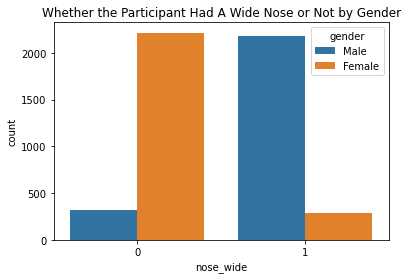

In [57]:
plt.title('Whether the Participant Had A Wide Nose or Not by Gender')
sns.countplot(df['nose_wide'], hue=df["gender"])

<AxesSubplot:title={'center':'Whether the Participant Had Long Nose to Lip Length by Gender'}, xlabel='distance_nose_to_lip_long', ylabel='count'>

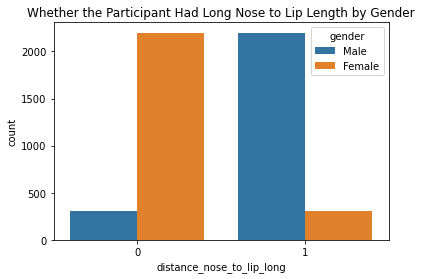

In [58]:
plt.title('Whether the Participant Had Long Nose to Lip Length by Gender')
sns.countplot(df['distance_nose_to_lip_long'], hue=df["gender"])

In [59]:
d = {"Male":0, "Female":1}
df['gender'] = df['gender'].map(d)

In [60]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [61]:
df_copy = df.copy(deep = True)
df_copy[['forehead_height_cm','nose_wide','nose_long','lips_thin', 'distance_nose_to_lip_long']] = df_copy[['forehead_height_cm','nose_wide','nose_long','lips_thin', 'distance_nose_to_lip_long']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

long_hair                       0
forehead_width_cm               0
forehead_height_cm              0
nose_wide                    2531
nose_long                    2461
lips_thin                    2535
distance_nose_to_lip_long    2506
gender                          0
dtype: int64


To fill these Nan values the data distribution needs to be understood

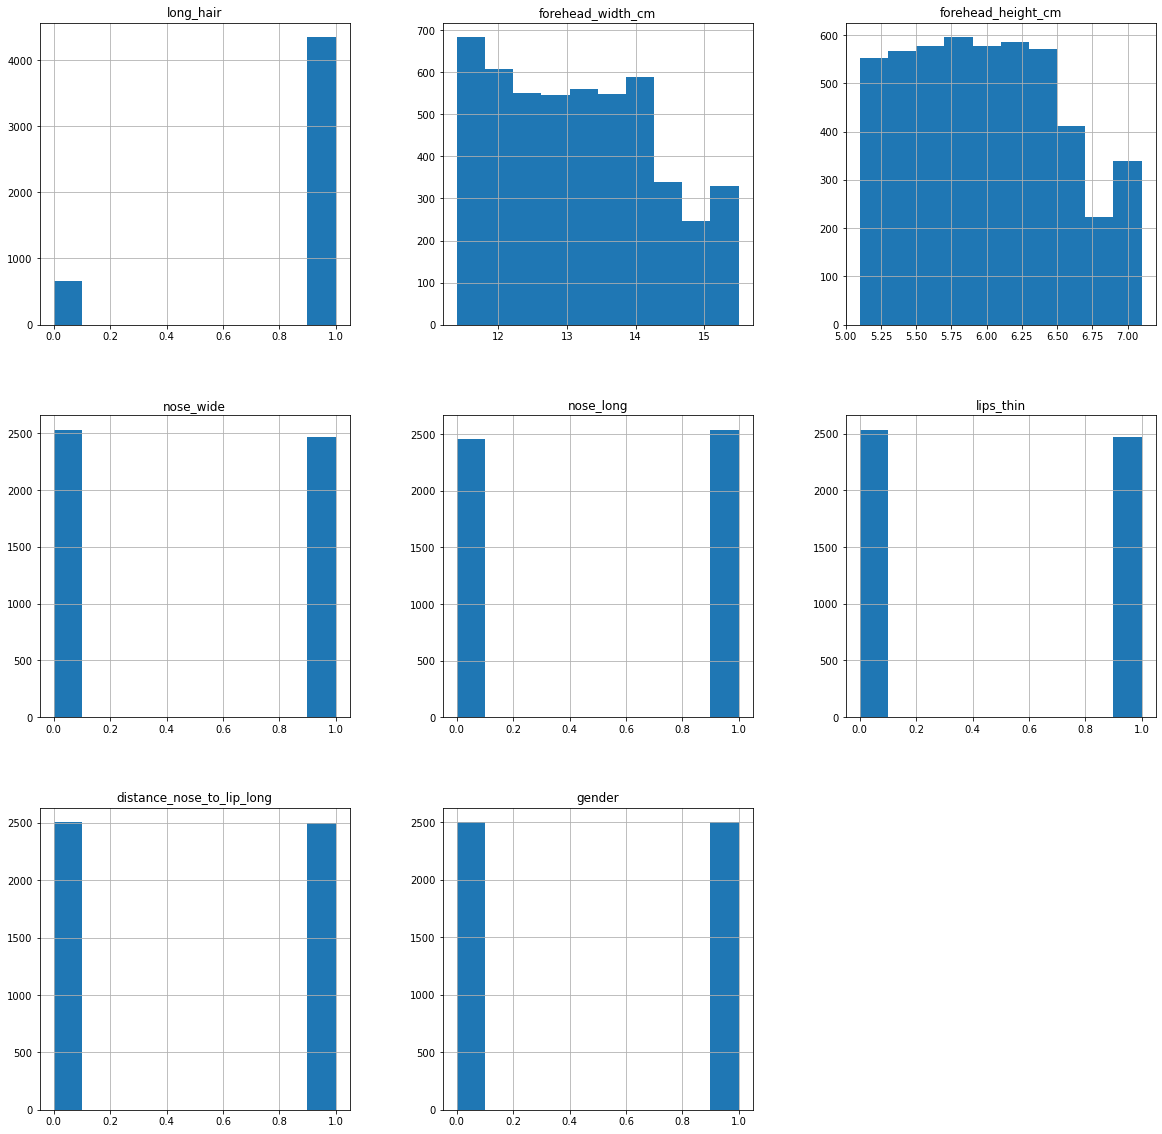

In [62]:
p = df.hist(figsize = (20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [63]:
# fillna means filling the nan values and why we use mean in 1 and 2 line bcoz of this is the continuous value 

df_copy['forehead_height_cm'].fillna(df_copy['forehead_height_cm'].median(), inplace = True) 
df_copy['nose_wide'].fillna(df_copy['nose_wide'].mean(), inplace = True)
df_copy['nose_long'].fillna(df_copy['nose_long'].mean(), inplace = True)
df_copy['lips_thin'].fillna(df_copy['lips_thin'].mean(), inplace = True)
df_copy['distance_nose_to_lip_long'].fillna(df_copy['distance_nose_to_lip_long'].mean(), inplace = True)

Plotting after Nan Removal

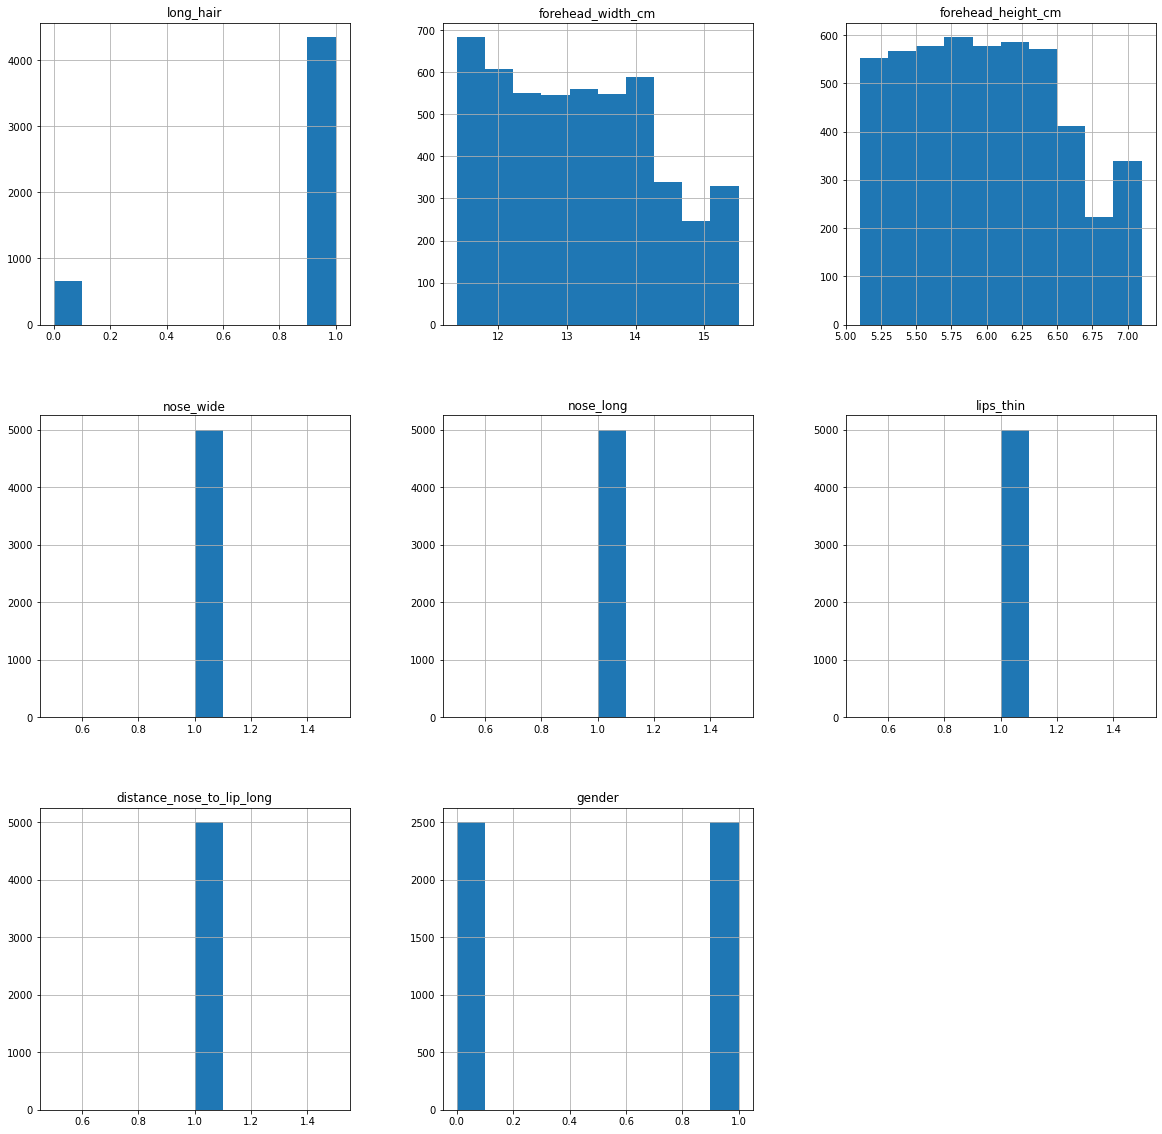

In [64]:
p = df_copy.hist(figsize = (20, 20))

Let's split the data into training and testing data

In [67]:
x = list(df.columns[:7])
x = df[x]
y = df['gender']

xTrain, xTest,yTrain,yTest = train_test_split(x,y, test_size=.4, random_state=42)

First let's try a simple decision tree

In [68]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xTrain,yTrain)

In [69]:
ypred = clf.predict(xTest)
ac = accuracy_score(yTest,ypred)
print(f"The accuracy score of the decision tree model is {round(ac,3)*100}%")

The accuracy score of the decision tree model is 95.8%


We can see this model is pretty good.

Let's try to do better with a random forest ensemble model.

In [70]:
Rclf = RandomForestClassifier(n_estimators=50, random_state=42)
Rclf = Rclf.fit(xTrain,yTrain)

In [71]:
yRPred = Rclf.predict(xTest)
ac = accuracy_score(yTest,yRPred)
print(f"The accuracy score of the random forest model is {round(ac,4)*100}%")

The accuracy score of the random forest model is 96.35000000000001%


We are getting better below is some code to try to optimize the number of estimators in the model.

In [72]:
scores =[]
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k, random_state=42)
    rfc.fit(xTrain, yTrain)
    y_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, y_pred))

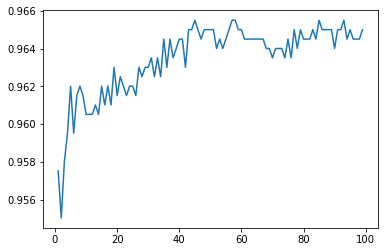

In [73]:
plt.plot(range(1,100), scores)

In [77]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(yTest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1017
           1       0.96      0.97      0.96       984

    accuracy                           0.97      2001
   macro avg       0.96      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



In [82]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(xTest)[:,1]
fpr, tpr, thresholds = roc_curve(yTest, y_pred_proba)

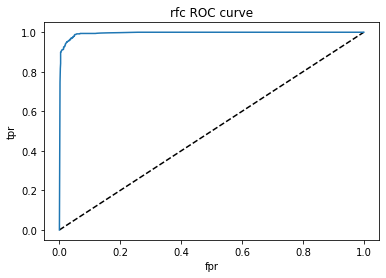

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='rfc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('rfc ROC curve')
plt.show()

In [87]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(yTest,y_pred_proba)

0.9951410373248275